In [20]:
from sklearn import model_selection
from sklearn import metrics
import os
import numpy as np
import pandas as pd
from MicroBiome import MicroBiomeDataSet, Trainer, TrainTester, MultiTrainTester
from sklearn import linear_model as LM
from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
import copy

# Load Data

In [21]:
top_dir = '/project'
data_dir = os.path.join(top_dir, 'data')
preproc_dir = os.path.join(data_dir, 'preprocessed')
inp_dir = os.path.join(preproc_dir, 'Gupta_2020_Precompiled_Cleaned')

In [22]:
os.listdir(inp_dir)

['MatrixDataClean.csv', 'SampleMetaDataClean.csv', 'FeatMetaDataClean.csv']

In [23]:
MatrixData = np.loadtxt(os.path.join(inp_dir, 'MatrixDataClean.csv'))
MatrixData.shape

(4347, 903)

In [24]:
SampleMeta = pd.read_csv(os.path.join(inp_dir, 'SampleMetaDataClean.csv'))
SampleMeta

,6,study,Study No. (From VG sheet (V-*) from SB sheet (S-*)),Title of Paper,Author (year),Journal,Study Accession,Sample Accession or Sample ID,Sample title (ENA/SRA),Sample title (Paper),...,Use of milk or milk products (Yes/No/Sometimes),Use of Animal Product- Meat (Yes/No/Vegetarian/Vegan),Alcohol Consumption (Yes/No),Diet1,Intervention for study (Diet),Intervention for study (medication),Sequencing Platform,Library layout (SINGLE/PAIRED),Read count after Quality control,Healthy
0,SAMEA104142287,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142287,ZSL-004,ZSL-004,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,43356775.0,Unhealthy
1,SAMEA104142288,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142288,ZSL-007,ZSL-007,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,41073871.0,Unhealthy
2,SAMEA104142293,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142293,ZSL-010,ZSL-010,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,40199673.0,Unhealthy
3,SAMEA104142291,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142291,ZSL-011,ZSL-011,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,31054158.0,Unhealthy
4,SAMEA104142284,V-2_ACVD,V-2,The gut microbiome in atherosclerotic cardiova...,Jie (2017),Nature communications,PRJEB21528,SAMEA104142284,ZSL-019,ZSL-019,...,NaN,NaN,NaN,NaN,NaN,NaN,Illumina HiSeq 2000,PAIRED,36081150.0,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342,SAMEA4431948,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431948,SZAXPI029564-74,SZAXPI029564-74,...,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,52212493.0,Unhealthy
4343,SAMEA4431949,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431949,SZAXPI029565-77,SZAXPI029565-77,...,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,50635879.0,Unhealthy
4344,SAMEA4431951,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431951,SZAXPI029567-80,SZAXPI029567-80,...,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,40712962.0,Unhealthy
4345,SAMEA4431964,S-7_Underweight,S-7,Two distinct metacommunities characterize the ...,He (2017),Gigascience,PRJEB15371,SAMEA4431964,SZAXPI029580-98,SZAXPI029580-98,...,NaN,NaN,NaN,NaN,No,No,Illumina HiSeq 2000,PAIRED,38177360.0,Unhealthy


In [25]:
FeatMeta = pd.read_csv(os.path.join(inp_dir, 'FeatMetaDataClean.csv'))
FeatMeta

,Unnamed: 0,feature
0,s__Abiotrophia_defectiva,s__Abiotrophia_defectiva
1,s__Acetobacter_unclassified,s__Acetobacter_unclassified
2,s__Achromobacter_piechaudii,s__Achromobacter_piechaudii
3,s__Achromobacter_unclassified,s__Achromobacter_unclassified
4,s__Achromobacter_xylosoxidans,s__Achromobacter_xylosoxidans
...,...,...
898,s__Weissella_koreensis,s__Weissella_koreensis
899,s__Weissella_paramesenteroides,s__Weissella_paramesenteroides
900,s__Weissella_unclassified,s__Weissella_unclassified
901,s__Wohlfahrtiimonas_chitiniclastica,s__Wohlfahrtiimonas_chitiniclastica


# Run PCA with RBF Kernel

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(MatrixData)

In [27]:
# Do all principal components
pca_model = KernelPCA(n_components = 100, kernel = 'rbf')

In [28]:
X_PCA = pca_model.fit_transform(X_scaled)

In [29]:
X_PCA.shape

(4347, 100)

<AxesSubplot:>

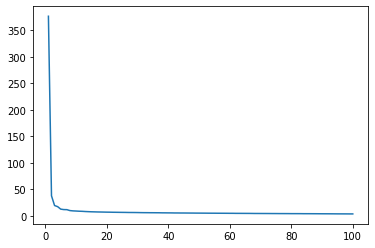

In [30]:
sns.lineplot(x = np.arange(1,101), y = pca_model.lambdas_[0:100])

<AxesSubplot:>

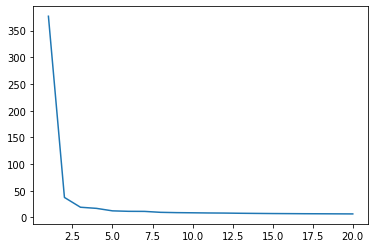

In [31]:
sns.lineplot(x = np.arange(1,21), y = pca_model.lambdas_[0:20])

In [32]:
# get median absolute deviation of components to see where variance is not affected by outliers
mad_vals = np.array([stats.median_absolute_deviation(X_PCA[:, i]) for i in range(X_PCA.shape[1])])

/root/anaconda/envs/microbiome/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `median_absolute_deviation` is deprecated, use `median_abs_deviation` instead!

To preserve the existing default behavior, use
`scipy.stats.median_abs_deviation(..., scale=1/1.4826)`.
The value 1.4826 is not numerically precise for scaling
with a normal distribution. For a numerically precise value, use
`scipy.stats.median_abs_deviation(..., scale='normal')`.

  


<AxesSubplot:>

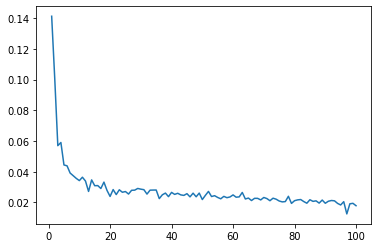

In [33]:
sns.lineplot(x = np.arange(1,101), y = mad_vals[0:100])

In [34]:
mad_ordered_PCs = np.argsort(-mad_vals)
mad_ordered_PCs

array([ 0,  1,  3,  2,  4,  5,  6,  7, 10,  8, 13,  9, 11, 17, 15, 14, 28,
       16, 29, 20, 30, 22, 34, 33, 27, 32, 26, 18, 51, 12, 24, 23, 39, 62,
       48, 37, 46, 41, 44, 25, 31, 40, 21, 36, 42, 59, 50, 43, 53, 77, 56,
       19, 52, 38, 47, 45, 61, 58, 60, 54, 69, 57, 64, 72, 66, 67, 70, 35,
       55, 63, 73, 81, 49, 84, 80, 68, 88, 91, 65, 79, 71, 92, 86, 74, 90,
       85, 82, 76, 95, 75, 87, 83, 89, 98, 93, 78, 97, 94, 99, 96])

In [35]:
mad_vals.shape

(100,)

<AxesSubplot:>

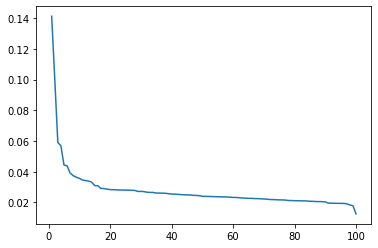

In [36]:
sns.lineplot(x = np.arange(1,101), y = mad_vals[mad_ordered_PCs[0:100]])

In [38]:
for i in range(0, 100):
    PC_name = 'PC' + str(i)
    SampleMeta[PC_name] = X_PCA[:, i]

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

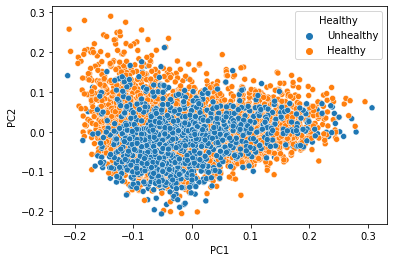

In [39]:
sns.scatterplot(data = SampleMeta, x = 'PC1', y = 'PC2', hue = 'Healthy')

<AxesSubplot:xlabel='PC3', ylabel='PC4'>

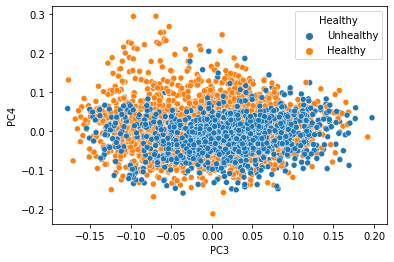

In [40]:
sns.scatterplot(data = SampleMeta, x = 'PC3', y = 'PC4', hue = 'Healthy')

<AxesSubplot:xlabel='PC5', ylabel='PC6'>

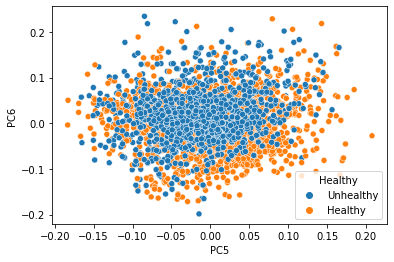

In [41]:
sns.scatterplot(data = SampleMeta, x = 'PC5', y = 'PC6', hue = 'Healthy')

In [43]:
healthy_inds = np.argwhere(SampleMeta['Healthy'].to_numpy() == 'Healthy')
unhealthy_inds = np.argwhere(SampleMeta['Healthy'].to_numpy() != 'Healthy')

In [44]:
t_test_results = {'PC': [], 't': [], 'p': []}
for x in range(0,20):
    pc_name = 'PC'+str(x + 1)
    pc_vals = SampleMeta[pc_name].to_numpy().astype('float')
    t_test_result_x = stats.ttest_ind(pc_vals[healthy_inds], pc_vals[unhealthy_inds])
    t_test_results['PC'].append(pc_name)
    t_test_results['t'].append(t_test_result_x[0])
    t_test_results['p'].append(t_test_result_x[1])

In [45]:
t_test_results = pd.DataFrame(t_test_results)
t_test_results

,PC,t,p
0,PC1,[4.572031740367621],[4.964449815520576e-06]
1,PC2,[12.313910310686882],[2.8255786754106337e-34]
2,PC3,[-10.659913417514716],[3.295468011224582e-26]
3,PC4,[7.635743723615844],[2.7436054008765934e-14]
4,PC5,[11.06063737085184],[4.597299668421374e-28]
5,PC6,[-12.938626049711784],[1.3375409871058444e-37]
6,PC7,[1.7912647761935336],[0.07332039080509564]
7,PC8,[-1.2065412190078817],[0.22767456265899427]
8,PC9,[-2.2855514481750276],[0.02232845905786485]
9,PC10,[-2.5502541383139827],[0.010798462918549825]


<AxesSubplot:xlabel='PC2', ylabel='PC4'>

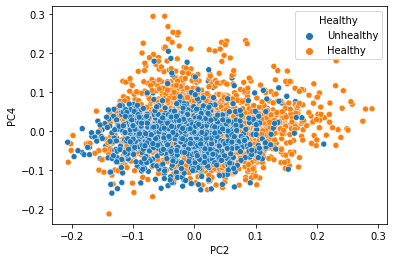

In [46]:
sns.scatterplot(data = SampleMeta, x = 'PC2', y = 'PC4', hue = 'Healthy')

<AxesSubplot:xlabel='PC2', ylabel='PC6'>

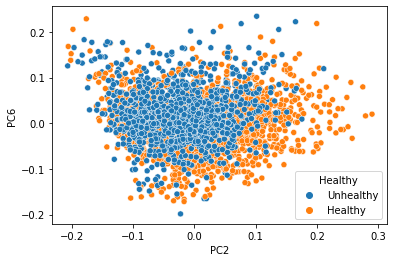

In [47]:
sns.scatterplot(data = SampleMeta, x = 'PC2', y = 'PC6', hue = 'Healthy')